In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn import datasets

import statsmodels.api as sm
import statsmodels.formula.api as smf

### Boston (regression)

In [2]:
boston = datasets.load_boston()

In [3]:
X = boston["data"]
y = boston["target"]
cols = boston["feature_names"]

In [4]:
df = pd.DataFrame(X, columns=cols)
df["target"] = y

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


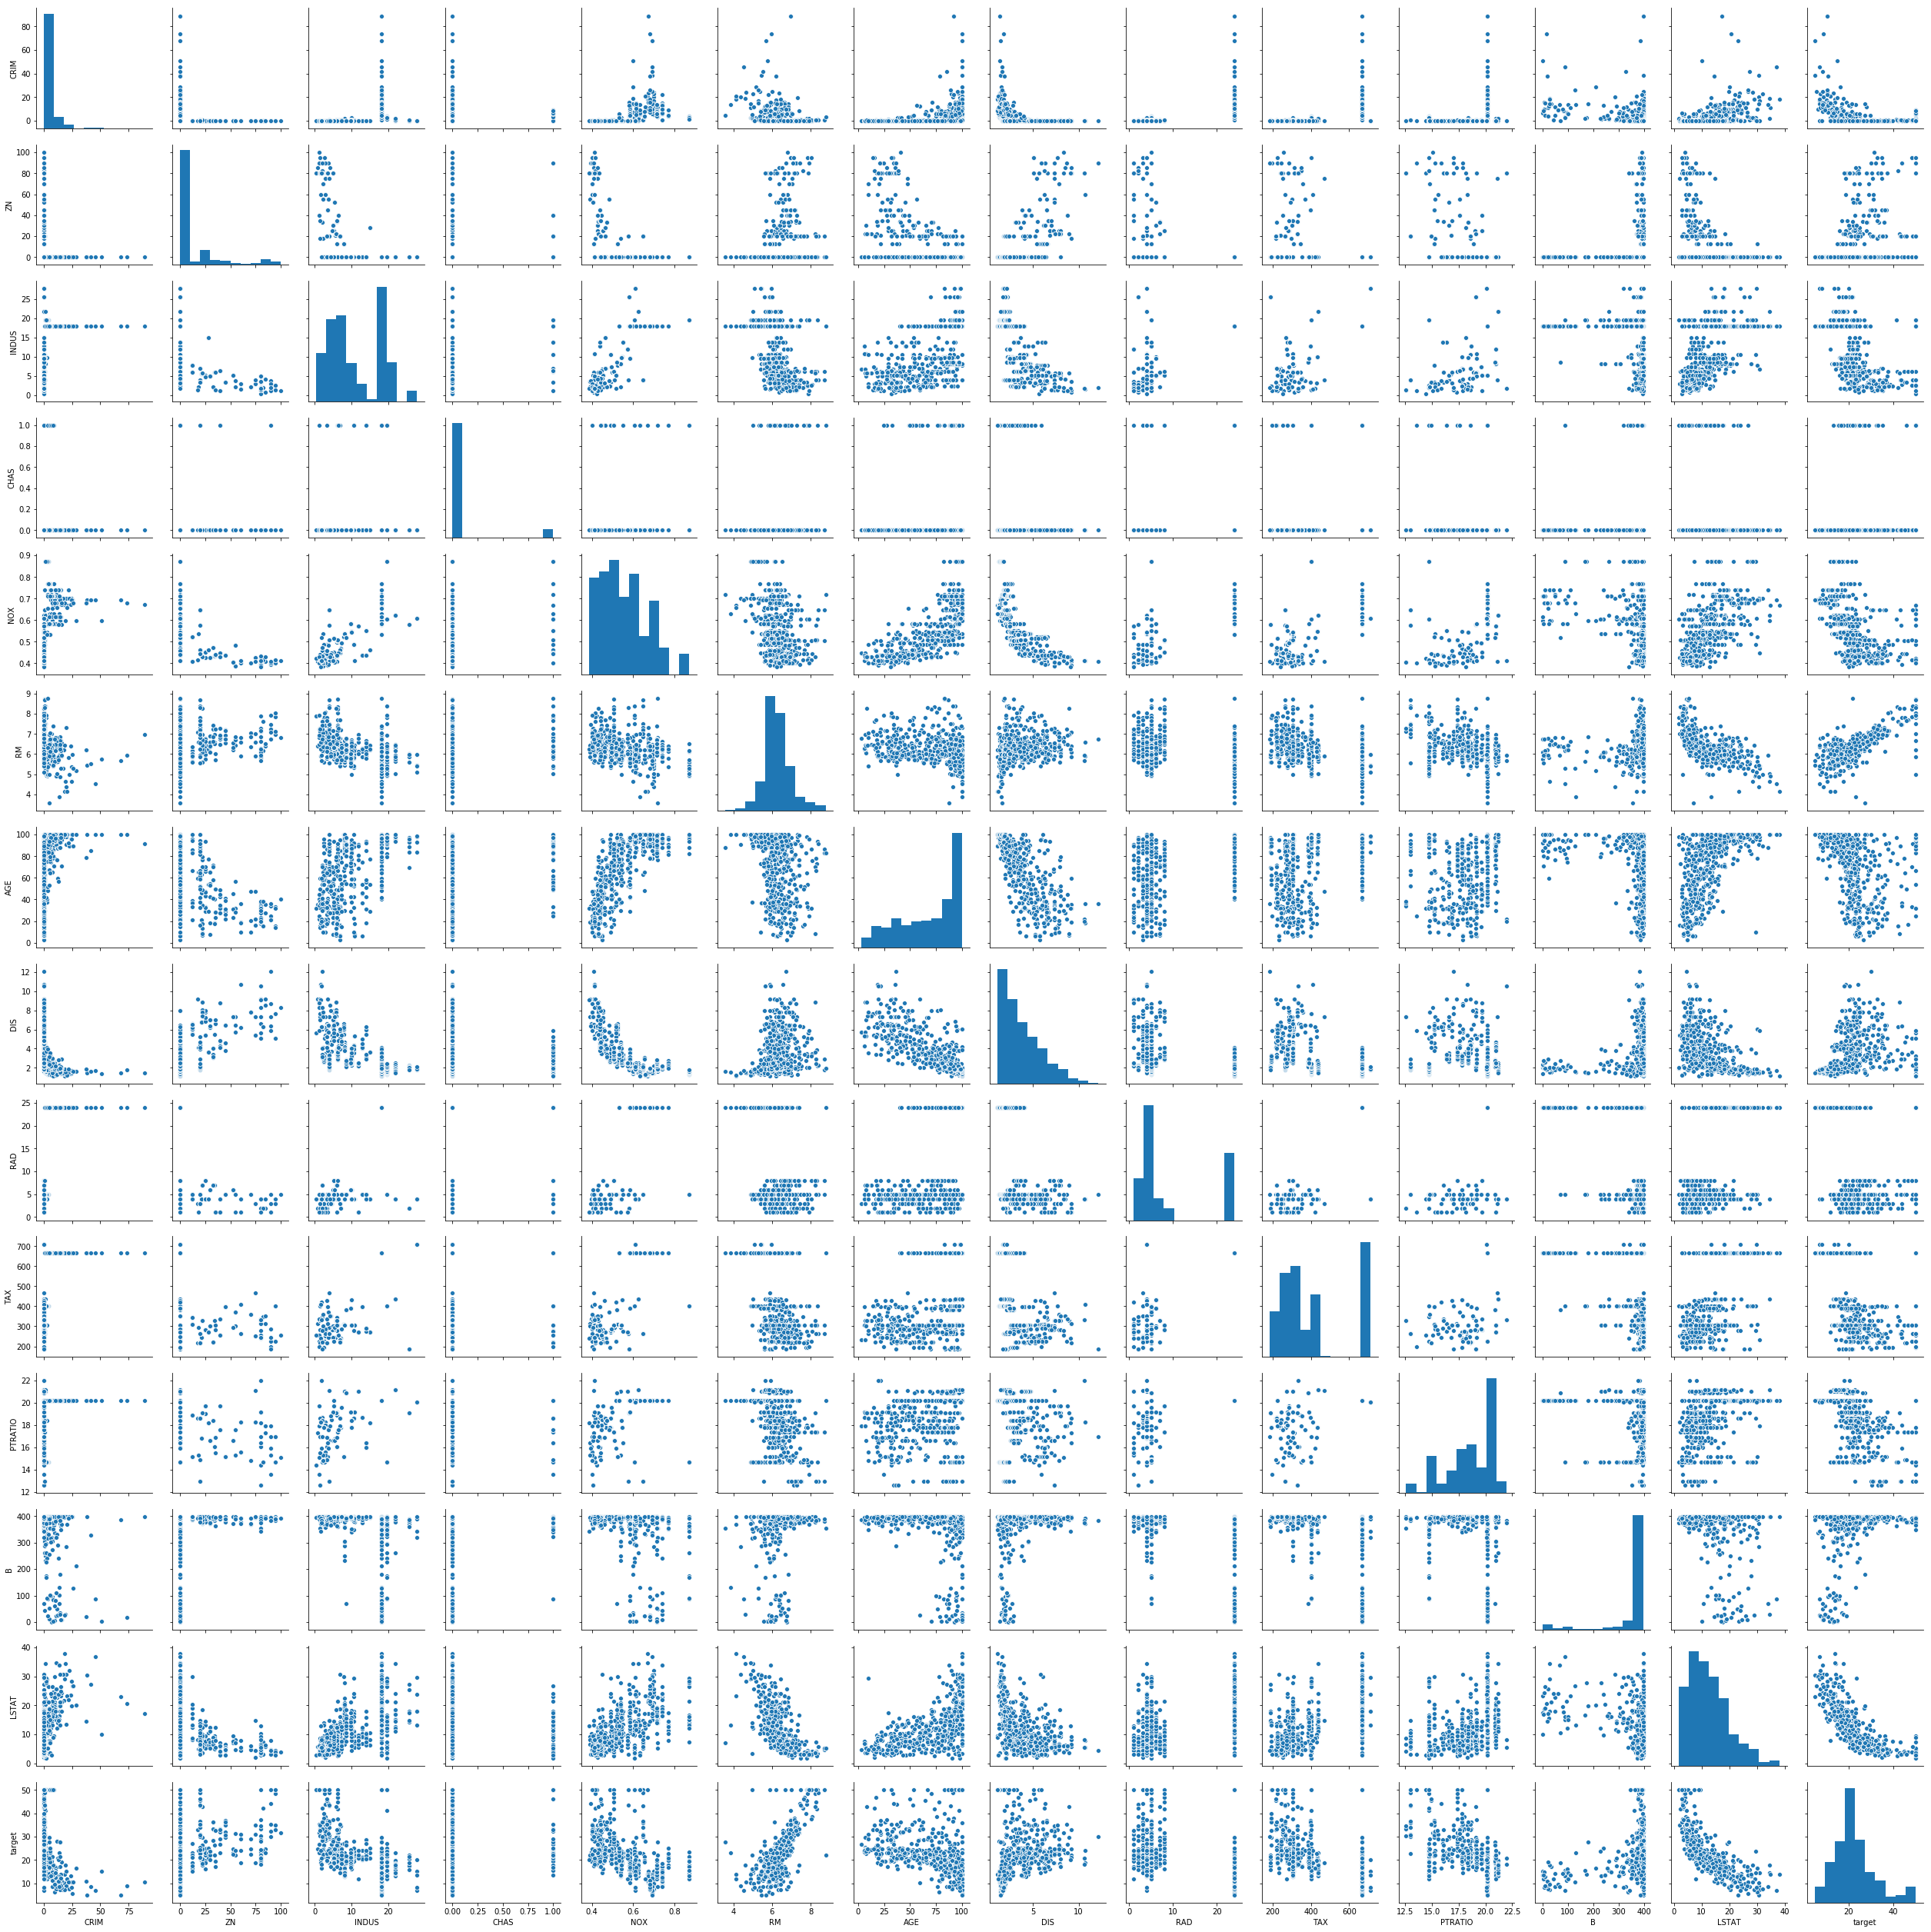

In [7]:
# sns.pairplot(data, hue="species")
sns.pairplot(df)

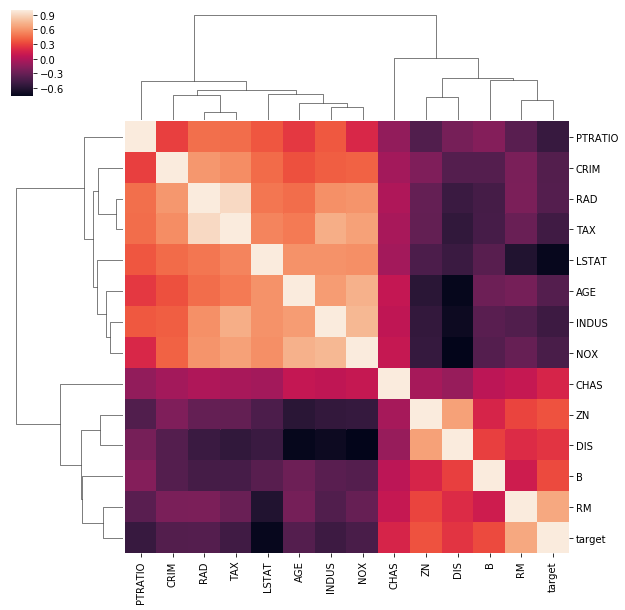

In [8]:
m = "pearson"
# m = "kendall"
# m = "spearman"
sns.clustermap(df.corr(method=m))

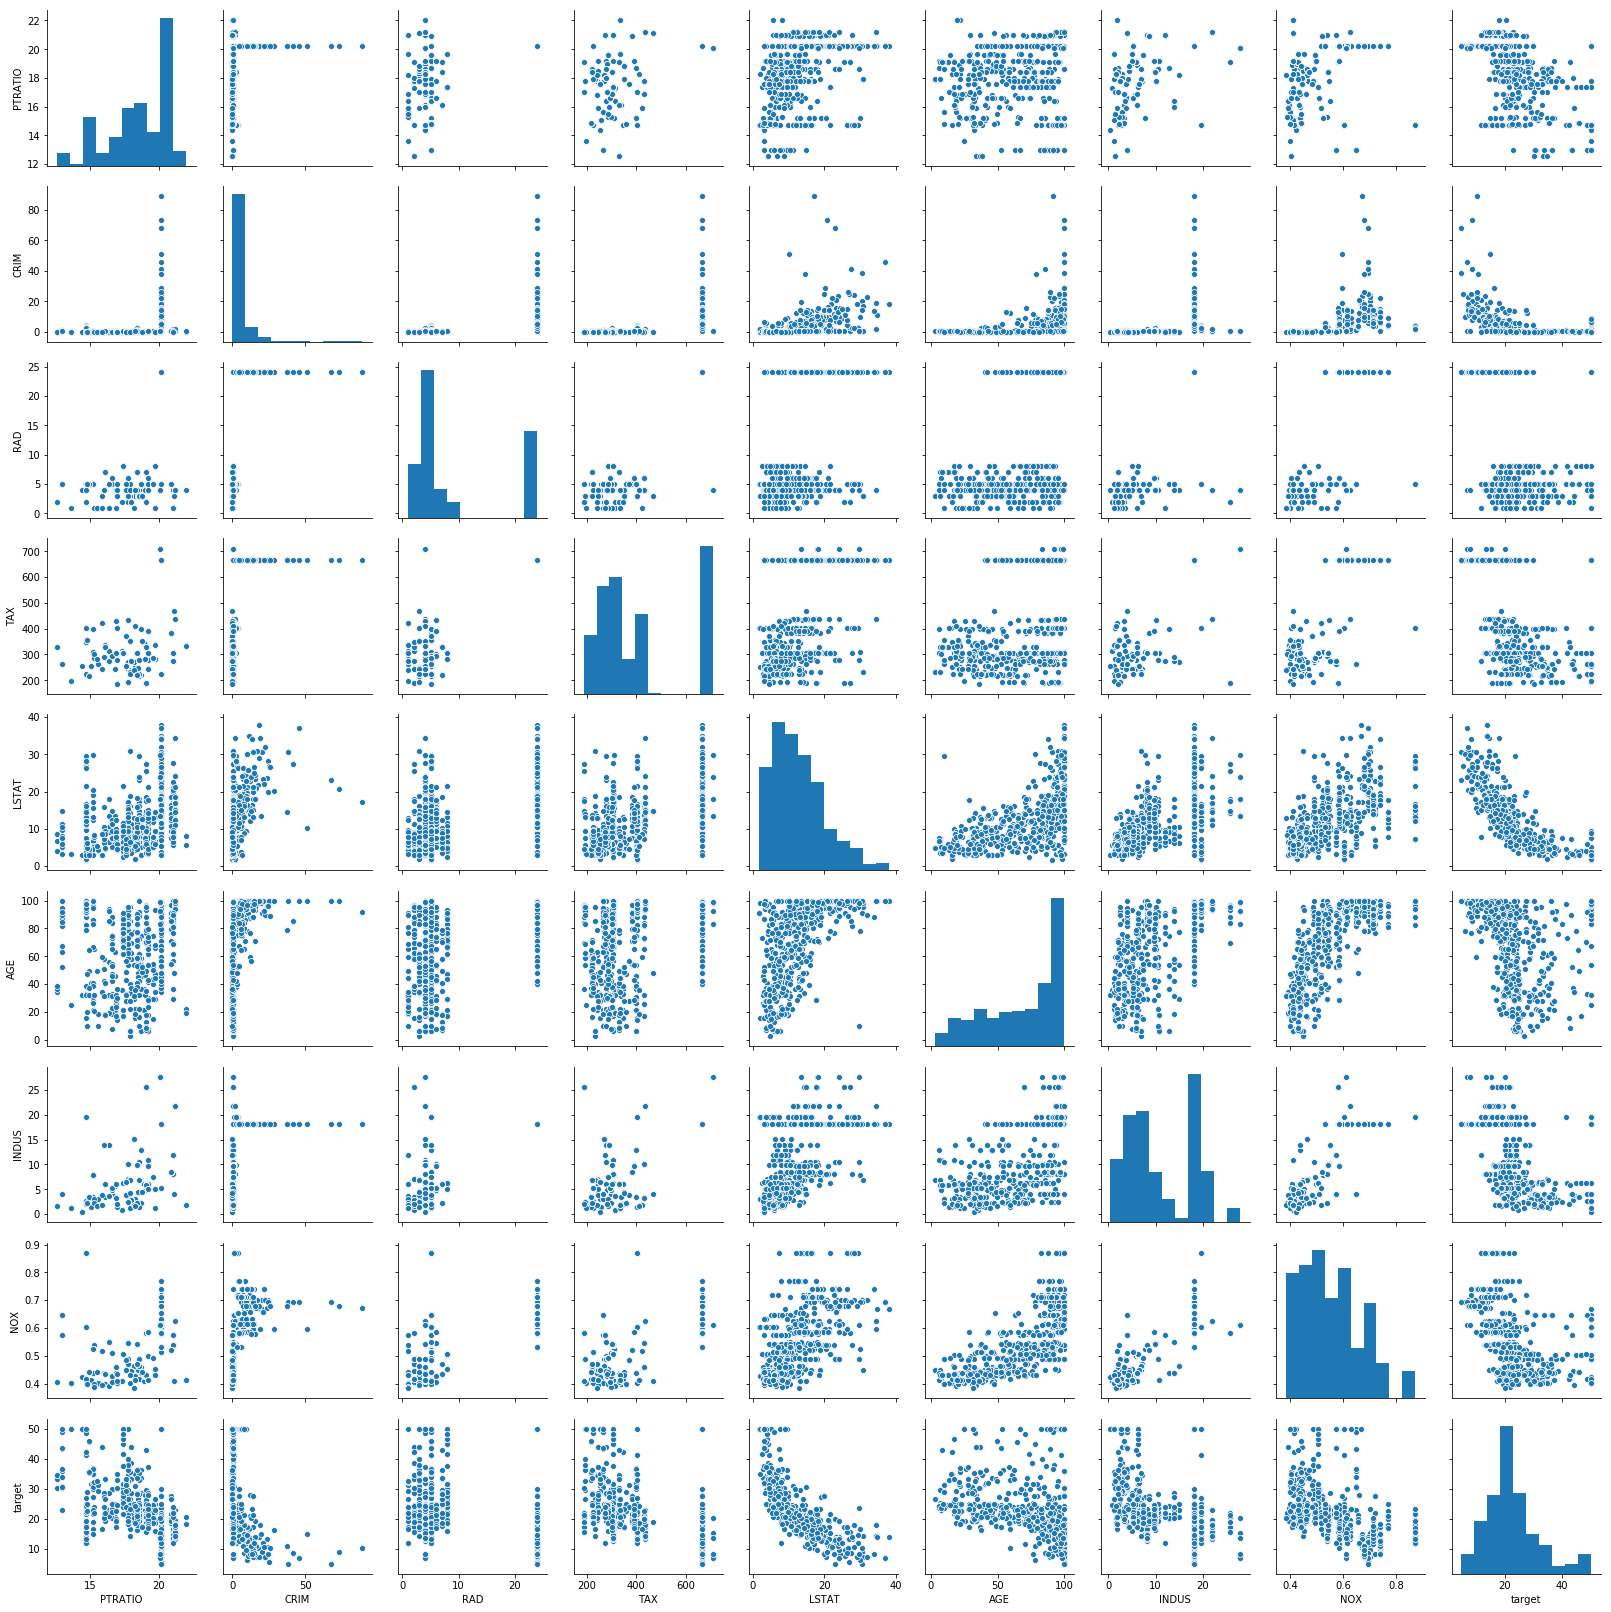

In [10]:
sns.pairplot(df[["PTRATIO","CRIM","RAD","TAX","LSTAT","AGE","INDUS","NOX","target"]])

In [26]:
df["LSTAT_-2"] = df["LSTAT"]*df["LSTAT"]*-1
df["LSTAT_2"] =  df["LSTAT"]*df["LSTAT"]
df["LSTAT_-4"] = df["LSTAT"]*df["LSTAT"]*df["LSTAT"]*df["LSTAT"]*-1
df["LSTAT_log"] = np.log(df["LSTAT"])

from scipy import stats
df["LSTAT_boxcox"], _ = stats.boxcox(df["LSTAT"])

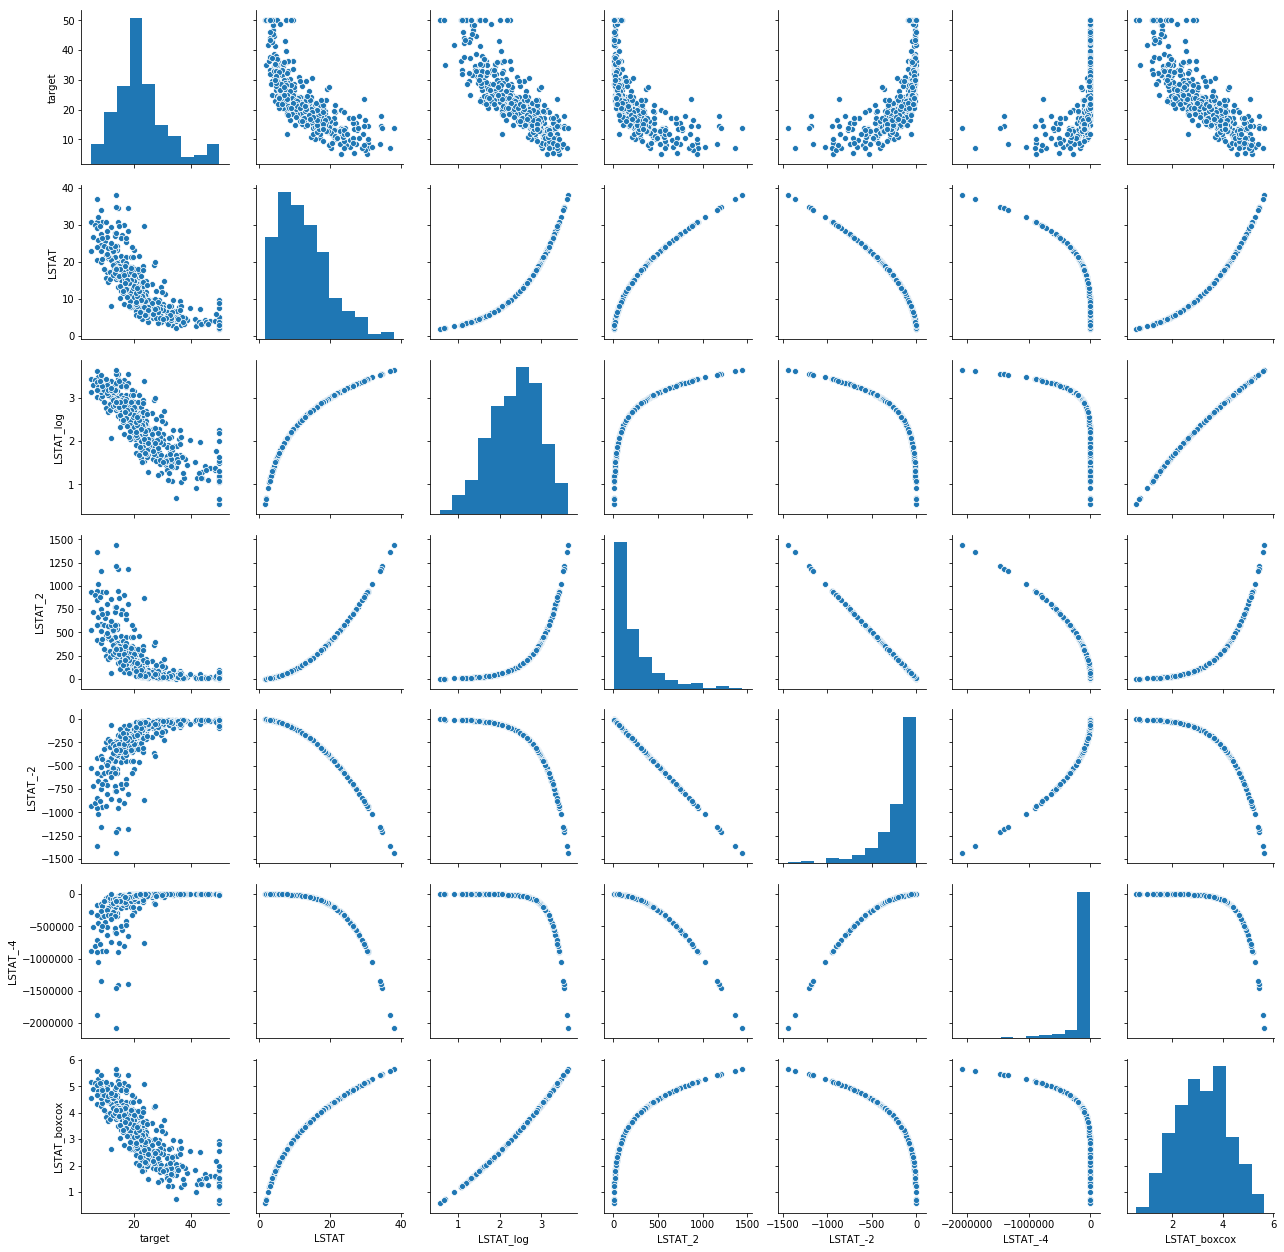

In [27]:
sns.pairplot(df[["target","LSTAT","LSTAT_log","LSTAT_2","LSTAT_-2","LSTAT_-4", "LSTAT_boxcox"]])

In [28]:
df[["target","LSTAT","LSTAT_log","LSTAT_2","LSTAT_-2","LSTAT_-4","LSTAT_boxcox"]].corr()

,target,LSTAT,LSTAT_log,LSTAT_2,LSTAT_-2,LSTAT_-4,LSTAT_boxcox
target,1.000000,-0.737663,-0.815442,-0.622179,0.622179,0.424554,-0.804269
LSTAT,-0.737663,1.000000,0.944031,0.960573,-0.960573,-0.791177,0.967246
LSTAT_log,-0.815442,0.944031,1.000000,0.824236,-0.824236,-0.595997,0.996682
LSTAT_2,-0.622179,0.960573,0.824236,1.000000,-1.000000,-0.921615,0.863896
LSTAT_-2,0.622179,-0.960573,-0.824236,-1.000000,1.000000,0.921615,-0.863896
LSTAT_-4,0.424554,-0.791177,-0.595997,-0.921615,0.921615,1.000000,-0.644095
LSTAT_boxcox,-0.804269,0.967246,0.996682,0.863896,-0.863896,-0.644095,1.000000


In [31]:
con = smf.ols("target~PTRATIO+CRIM+RAD+TAX+LSTAT_log+AGE+INDUS+NOX", data=df).fit().summary()

In [32]:
con

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          7.81e-143
Time:                        23:11:02   Log-Likelihood:                -1492.9
No. Observations:                 506   AIC:                             3004.
Df Residuals:                     497   BIC:                             3042.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9114      2.763     26.386      0.000      67.482      78.341
PTRATIO       -1.0299      0.121     -8.544      0.000      -1.267      -0.793
CRIM          -0.1292      0.031     -4.130      0.000      -0.191      -0.068
RAD            0.3754      0.063      5.919      0.000       0.251       0.500
TAX           -0.0151      0.004     -4.253      0.000      -0.022      -0.008
LSTAT_log    -12.2093      0.489    -24.976      0.000     -13.170     -11.249
AGE            0.0804      0.012      6.920      0.000       0.058       0.103
INDUS          0.0878      0.057      1.538      0.125      -0.024       0.200
NOX          -10.6096      3.535     -3.001      0.003     -17.556      -3.664
==============================================================================
Omnibus:                      137.102   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.372
Skew:                           1.255   Prob(JB):                     1.75e-95
Kurtosis:                       6.794   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
con

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          1.39e-106
Time:                        23:09:42   Log-Likelihood:                -1578.4
No. Observations:                 506   AIC:                             3175.
Df Residuals:                     497   BIC:                             3213.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.8261      3.314     19.258      0.000      57.314      70.338
PTRATIO       -1.3743      0.140     -9.813      0.000      -1.649      -1.099
CRIM          -0.0969      0.038     -2.582      0.010      -0.171      -0.023
RAD            0.4232      0.075      5.644      0.000       0.276       0.570
TAX           -0.0163      0.004     -3.885      0.000      -0.025      -0.008
LSTAT         -0.8492      0.049    -17.396      0.000      -0.945      -0.753
AGE            0.0624      0.014      4.555      0.000       0.035       0.089
INDUS          0.0751      0.068      1.110      0.268      -0.058       0.208
NOX          -13.2286      4.181     -3.164      0.002     -21.443      -5.014
==============================================================================
Omnibus:                      136.273   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.728
Skew:                           1.384   Prob(JB):                     3.73e-70
Kurtosis:                       5.740   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### IRIS (classification)

In [2]:
iris = datasets.load_iris()

In [4]:
X = iris["data"]
y = iris["target"]
cols = iris["feature_names"]

In [5]:
df = pd.DataFrame(X, columns=cols)

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(df,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(df, approximate=True)
shap.summary_plot(shap_values, df, plot_type="bar", max_display=10)

In [ ]:
shap.summary_plot(shap_values[0], df, max_display=20)
# shap.summary_plot(shap_values[1], df, max_display=20)

In [ ]:
shap.initjs()
sample_no = 0
class_no = 0
shap.force_plot(explainer.expected_value[class_no], shap_values[class_no][sample_no], df.iloc[sample_no,])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], df)
# shap.force_plot(explainer.expected_value[1], shap_values[1], df)

In [ ]:
shap.dependence_plot("sepal length (cm)", shap_values[0], df, interaction_index="sepal width (cm)")
# shap.dependence_plot("sepal length (cm)", shap_values[1], df, interaction_index="sepal width (cm)")

### XGB

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
"""
best_params = {
  "colsample_bytree": 0.7,
  "gamma": 0.1,
  "learning_rate": 0.05,
  "max_depth": 2.0,
  "min_child_weight": 3.0,
  "n_estimators": 10.0,
  "nthread": 4.0,
  "seed": 1337.0,
  "subsample": 0.8,
  "objective": "multi:softmax"
}

clf = XGBClassifier(learning_rate=best_params["learning_rate"],\
                             n_estimators=best_params["n_estimators"],\
                             max_depth=best_params["max_depth"],\
                             min_child_weight=best_params["min_child_weight"],\
                             gamma=best_params["gamma"],\
                             subsample=best_params["subsample"],\
                             colsample_bytree=best_params["colsample_bytree"],\
                             objective=best_params["objective"],\
                             nthread=best_params["nthread"],\
                             seed=best_params["seed"],\
                            #  tree_method=best_params["tree_method"],\
                             num_class = 3)
"""

# https://xgboost.readthedocs.io/en/latest/parameter.html
# "reg:logistic"
# "reg:squarederror"

clf = XGBClassifier(learning_rate=0.05, n_estimators=100, max_depth=2, objective="multi:softmax", num_class = 3)

In [ ]:
clf.fit(df.values, y)

### XGB+CV

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

K = 5
skfold = StratifiedKFold(n_splits=K, random_state=7, shuffle=True)

oof = np.zeros([len(X_train), N_CLASS])
predictions = np.zeros([K, len(X_test), N_CLASS])
fmp = np.zeros((K, X_train.shape[1]))

for fold_, (train_index, valid_index) in enumerate(skfold.split(X_train, y_train)):
    print("Fold:",fold_)
    train_X, valid_X = X_train[train_index], X_train[valid_index]
    train_y, valid_y = y_train[train_index], y_train[valid_index]
    
    estimator = clf_best.fit(train_X, train_y, eval_set=[(valid_X, valid_y)], verbose=5, early_stopping_rounds=100)
    # pickle.dump(estimator, open("000{}.model_{}.pickle.dat".format(fold_, i), "wb"))
    
    predictions[fold_] = estimator.predict_proba(X_test)
    oof[valid_index] = estimator.predict_proba(valid_X)
    fmp[fold_] = estimator.feature_importances_

In [ ]:
# df_fmp = pd.DataFrame(fmp.transpose(), index=train.drop("label", axis=1).columns)
# df_fmp.to_csv("fmp.csv")
pred = np.argmax(predictions.mean(axis=0), axis=1)
confusion = confusion_matrix(y_test, pred)
print("the confusion matrix:", confusion)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### NN (keras)

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)

print('Accuracy: %.2f' % (accuracy*100))